In [1]:
import os
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import yaml
import torch
from tqdm.auto import tqdm
import shutil
from PIL import Image

In [2]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.14 🚀 Python-3.8.18 torch-2.2.0+cu121 CUDA:0 (NVIDIA A100 80GB PCIe, 81051MiB)
Setup complete ✅ (96 CPUs, 866.1 GB RAM, 1061.5/1984.7 GB disk)


In [3]:
from ultralytics import YOLO

In [4]:
model = YOLO('yolov8s.pt') # n/ s / ....

In [7]:
yolo_format=dict(path="/home/KDT-admin/data",
                 train="/home/KDT-admin/data/images/train",
                 val="/home/KDT-admin/data/images/val",
                 nc=7,
                 names={0: 'anger', 1: 'anxiety', 2: 'embrrass', 3: 'happy', 4: 'normal', 5: 'pain', 6: 'sad'})

with open('/home/KDT-admin/data/yolo/yolo.yaml', 'w') as outfile:
    yaml.dump(yolo_format, outfile, default_flow_style=False)

In [5]:
yolo_format=dict(path="/home/KDT-admin/data_1000",
                 train="/home/KDT-admin/data_1000/images/train",
                 val="/home/KDT-admin/data_1000/images/val",
                 nc=7,
                 names={0: 'anger', 1: 'anxiety', 2: 'embrrass', 3: 'happy', 4: 'normal', 5: 'pain', 6: 'sad'})

with open('/home/KDT-admin/data/yolo/yolo.yaml', 'w') as outfile:
    yaml.dump(yolo_format, outfile, default_flow_style=False)

In [5]:
model.train(data="/home/KDT-admin/data/yolo/yolo.yaml",epochs=10,patience=5,batch=8,optimizer='auto', # SGD, Adam, AdamW, NAdam, RAdam, RMSProp 등
                    lr0=0.0005,imgsz=640)

New https://pypi.org/project/ultralytics/8.1.17 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.14 🚀 Python-3.8.18 torch-2.2.0+cu121 CUDA:0 (NVIDIA A100 80GB PCIe, 81051MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/home/KDT-admin/data/yolo/yolo.yaml, epochs=10, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, 

Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

train: Scanning /home/KDT-admin/data_1000/labels/train... 5600 images, 0 backgrounds, 3 corrupt: 100%|██████████| 5600/5600 [02:04<00:00, 45.14it/s]

train: WARNING ⚠️ /home/KDT-admin/data_1000/images/train/image0000.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/KDT-admin/data_1000/images/train/image0003.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/KDT-admin/data_1000/images/train/image0005.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/KDT-admin/data_1000/images/train/image0007.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/KDT-admin/data_1000/images/train/image0010.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/KDT-admin/data_1000/images/train/image0012.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/KDT-admin/data_1000/images/train/image0014.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/KDT-admin/data_1000/images/train/image0015.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/KDT-admin/data_1000/images/train/image0017.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/KDT-admin/data_1000/images/train/image00


val: Scanning /home/KDT-admin/data_1000/labels/val... 1400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1400/1400 [00:31<00:00, 44.70it/s]

val: WARNING ⚠️ /home/KDT-admin/data_1000/images/val/image0801.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/KDT-admin/data_1000/images/val/image0803.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/KDT-admin/data_1000/images/val/image0804.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/KDT-admin/data_1000/images/val/image0805.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/KDT-admin/data_1000/images/val/image0813.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/KDT-admin/data_1000/images/val/image0817.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/KDT-admin/data_1000/images/val/image0822.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/KDT-admin/data_1000/images/val/image0825.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/KDT-admin/data_1000/images/val/image0826.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/KDT-admin/data_1000/images/val/image0831.jpg: corrupt JPEG restored and saved


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train5
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.16G      1.319      4.944       1.64          8        640:  39%|███▉      | 273/700 [00:27<00:35, 12.03it/s]Corrupt JPEG data: premature end of data segment
       1/10      2.16G      1.227      3.846      1.571          8        640:  61%|██████    | 425/700 [00:41<00:26, 10.25it/s]


KeyboardInterrupt: 

In [7]:
model.names

{0: 'anger',
 1: 'anxiety',
 2: 'embrrass',
 3: 'happy',
 4: 'normal',
 5: 'pain',
 6: 'sad'}

In [ ]:
print(f"Mean Average Precision @.5:.95 : {metrics.box.map}")
print(f"Mean Average Precision @ .50   : {metrics.box.map50}")
print(f"Mean Average Precision @ .70   : {metrics.box.map75}")

NameError: name 'metrics' is not defined

In [ ]:
# 경로 수정 필요(best.pt path)

model = YOLO('/content/drive/MyDrive/est/프로젝트연습/runs/detect/train3/weights/best.pt')

In [ ]:
with torch.no_grad():
    results=model.predict(source=test_data,conf=0.50,iou=0.75)


image 1/175 /content/drive/MyDrive/est/프로젝트연습/data/testing_images/vid_5_25100.jpg: 384x640 (no detections), 21.8ms
image 2/175 /content/drive/MyDrive/est/프로젝트연습/data/testing_images/vid_5_25120.jpg: 384x640 (no detections), 36.8ms
image 3/175 /content/drive/MyDrive/est/프로젝트연습/data/testing_images/vid_5_25140.jpg: 384x640 (no detections), 11.4ms
image 4/175 /content/drive/MyDrive/est/프로젝트연습/data/testing_images/vid_5_25160.jpg: 384x640 (no detections), 10.7ms
image 5/175 /content/drive/MyDrive/est/프로젝트연습/data/testing_images/vid_5_25180.jpg: 384x640 (no detections), 10.7ms
image 6/175 /content/drive/MyDrive/est/프로젝트연습/data/testing_images/vid_5_25200.jpg: 384x640 (no detections), 10.7ms
image 7/175 /content/drive/MyDrive/est/프로젝트연습/data/testing_images/vid_5_25220.jpg: 384x640 (no detections), 10.7ms
image 8/175 /content/drive/MyDrive/est/프로젝트연습/data/testing_images/vid_5_25240.jpg: 384x640 (no detections), 10.7ms
image 9

In [ ]:
prediction_dir="/content/drive/MyDrive/est/프로젝트연습/predictions"

In [ ]:
test_img_list=[]
for result in results:
    if len(result.boxes.xyxy):
        name=result.path.split("/")[-1].split(".")[0]
        boxes=result.boxes.xyxy.cpu().numpy()
        scores=result.boxes.conf.cpu().numpy()

        test_img_list.append(name)

        label_file_path=os.path.join(prediction_dir,name+".txt")
        with open(label_file_path,"w+") as f:
            for score,box in zip(scores,boxes):
                text=f"{score:0.4f} "+" ".join(box.astype(str))
                f.write(text)
                f.write("\n")

In [ ]:
def show_bbox(img,boxes,scores,axis,color=(0,255,0)):
    boxes=boxes.astype(int)
    scores=scores
    img=img.copy()
    for i,box in enumerate(boxes):
        score=f"{scores[i]:.4f}"
        cv2.rectangle(img,(box[0],box[1]),(box[2],box[3]),color,2)
        y=box[1]-10 if box[1]-10>10 else box[1]+10
        cv2.putText(img,score,(box[0],y),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,2)

    axis.imshow(img)
    axis.axis("off")

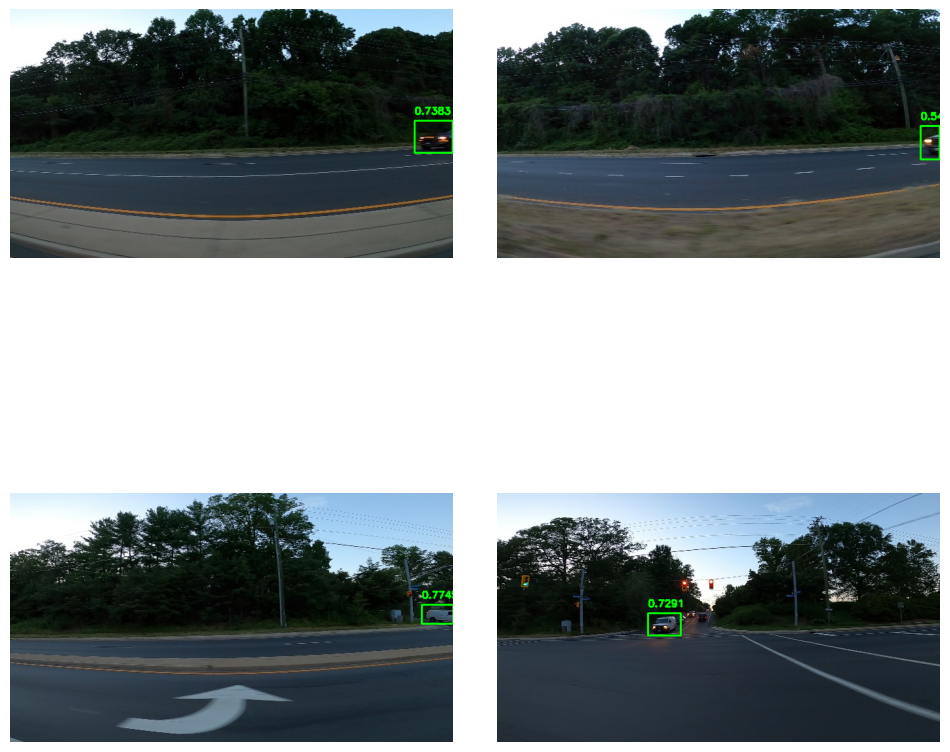

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(12,12))
plt.subplots_adjust(wspace=0.1,hspace=0.1)
ax=axes.flatten()

imgs_name=np.random.choice(test_img_list,4)

for i, img_name in enumerate(imgs_name):
    img_file_path=os.path.join(test_data,img_name+".jpg")
    img=cv2.imread(img_file_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    label_file_path=os.path.join(prediction_dir,img_name+".txt")
    label=pd.read_csv(label_file_path,sep=" ",header=None).values
    scores=label[:,0]
    boxes=label[:,1:]
    show_bbox(img,boxes,scores,axis=ax[i])

plt.savefig("car.png")

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive//best.pt conf=0.55 source=/content/drive/video save=True